# **Home Credit Project Based Internship**

**Project Background**

Karena riwayat kredit yang tidak memenuhi, banyak orang kesulitan mendapatkan pinjaman. Home Credit berusaha untuk memperluas inklusi keuangan dengan memberikan pengalaman pinjaman yang positif dan aman. Mereka menggunakan berbagai sumber data untuk memprediksi kemampuan pembayaran klien mereka. Pinjaman ini diberikan dengan pokok pinjaman, jatuh tempo, dan jadwal pembayaran yang memungkinkan pelanggan untuk berhasil sehingga mereka dapat melakukan pelunasan secara tidak tertolak yang akan memotivasi pelanggan untuk sukses.

**Objective**:

1. Mengidentifikasi karakteristik calon nasabah yang akan mengalami kesulitan dalam membayar kembali pinjamannya.
2. Memprediksi kemampuan pembayaran klien.

**Actions**:

1. Melakukan data cleaning, dan visualisasi data untuk memperoleh informasi data yang mudah dipahami.
2. Membangun model data dengan algoritma machine learning.
3. Memprediksi kemampuan pembayaran klien pada pengujian data aplikasi dengan model machine learning terbaik berdasarkan tingkat prediksi.
4. Memberikan rekomendasi bagi perusahaan untuk meningkatkan keberhasilan kliennya dalam mengajukan pinjaman dengan hasil .

#### **Import Library**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter('ignore')
import gc


# keras libraries
import tensorflow
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.metrics import Precision
from tqdm.keras import TqdmCallback
from keras.backend import clear_session

# sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# imblearn libraries
from imblearn.over_sampling import SMOTE

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#### **Load Dataset**

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# data application (train, test)
df_test = pd.read_csv('/content/drive/MyDrive/Project Magang Data/Home Credit Indonesia/application_test.csv', sep=',')
df_train = pd.read_csv('/content/drive/MyDrive/Project Magang Data/Home Credit Indonesia/application_train.csv', sep=',')
df_column_desc = pd.read_csv('/content/drive/MyDrive/Project Magang Data/Home Credit Indonesia/HomeCredit_columns_description.csv', encoding='latin-1')
print('This dataset train has %d rows dan %d columns.\n' % df_train.shape, 'This dataset test has %d rows dan %d columns.\n' % df_test.shape)
df_train.head()

This dataset train has 307511 rows dan 122 columns.
 This dataset test has 48744 rows dan 121 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Terdapat total 307.511 baris yang berisi informasi pinjaman dan terdapat 122 fitur dalam train dataset.
Terdapat total 48.744 baris yang berisi informasi pinjaman dan terdapat 121 fitur dalam test dataset.

#### **Check & Show Dataset**

In [5]:
# Checknull data train
df_train.info()
print('Train Data Missing Value ',df_train.isnull().sum().sum())
print('Train Data Duplicate Value ',df_train.duplicated().sum())
# Print the count of columns
num_columns = df_train.shape[1]
print(f"Number of columns: {num_columns}")
# Print the count of rows
num_rows = df_train.shape[0]
print(f"Number of rows: {num_rows}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
Train Data Missing Value  9152465
Train Data Duplicate Value  0
Number of columns: 122
Number of rows: 307511


In [6]:
# Checknull data test
df_test.info()
print('Test Data Missing Value ',df_test.isnull().sum().sum())
print('Test Data Duplicate Value ',df_test.duplicated().sum())
# Print the count of columns
num_columns = df_test.shape[1]
print(f"Number of columns: {num_columns}")
# Print the count of rows
num_rows = df_test.shape[0]
print(f"Number of rows: {num_rows}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
Test Data Missing Value  1404419
Test Data Duplicate Value  0
Number of columns: 121
Number of rows: 48744


In [7]:
Column_Train = df_column_desc[df_column_desc['Table'] == 'application_{train|test}.csv']
column_train = Column_Train[['Row','Description']]
column_train

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,Target variable (1 - client with payment diffi...
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


**Check if any innapropriate input**

In [8]:
#Unique Of Each Column
for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'SK_ID_CURR':
[100002 100003 100004 ... 456253 456254 456255]

Unique values in column 'TARGET':
[1 0]

Unique values in column 'NAME_CONTRACT_TYPE':
['Cash loans' 'Revolving loans']

Unique values in column 'CODE_GENDER':
['M' 'F' 'XNA']

Unique values in column 'FLAG_OWN_CAR':
['N' 'Y']

Unique values in column 'FLAG_OWN_REALTY':
['Y' 'N']

Unique values in column 'CNT_CHILDREN':
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]

Unique values in column 'AMT_INCOME_TOTAL':
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]

Unique values in column 'AMT_CREDIT':
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]

Unique values in column 'AMT_ANNUITY':
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]

Unique values in column 'AMT_GOODS_PRICE':
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]

Unique values in column 'NAME_TYPE_SUITE':
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group

## **Exploratory Data Analysis (EDA)**

#### **Visualization**

In [9]:
train = df_train.copy()

#### **Univearite : The Number of Customers Based on Their Repayment Abilities**

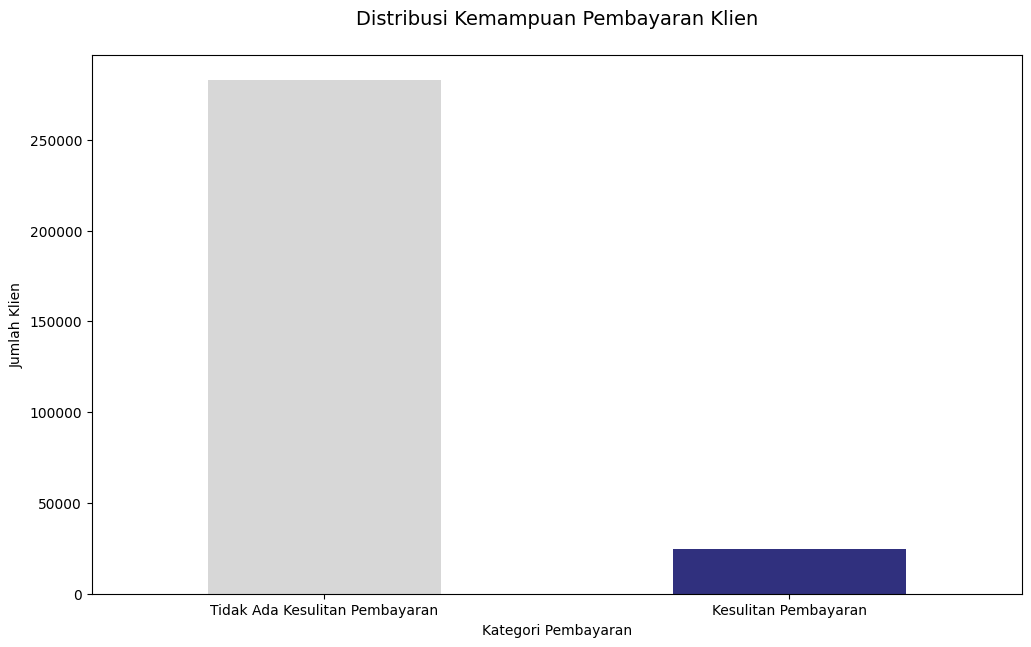

,Kategori Pembayaran,Persentase
0,Tidak Ada Kesulitan Pembayaran,0.919271
1,Kesulitan Pembayaran,0.080729


In [10]:
decode_map = {0: "Tidak Ada Kesulitan Pembayaran", 1: "Kesulitan Pembayaran"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

# Menghitung jumlah kategori pembayaran
target_count = train['TARGET'].value_counts()

# Menampilkan diagram batang
fig, ax = plt.subplots(figsize=(12, 7))
target_count.plot(kind='bar', color=['lightgrey', 'midnightblue'], alpha=0.9, rot=0, ax=ax)
ax.set_title('Distribusi Kemampuan Pembayaran Klien\n', fontsize=14)
ax.set_xlabel('Kategori Pembayaran')
ax.set_ylabel('Jumlah Klien')
plt.show()

# Menampilkan persentase distribusi
target_percentage = train['TARGET'].value_counts(normalize=True)

# Menampilkan data persentase dalam format tabel
target_percentage_table = target_percentage.reset_index().rename(columns={'index': 'Kategori Pembayaran', 'TARGET': 'Persentase'})
target_percentage_table.style.background_gradient(cmap='Blues')

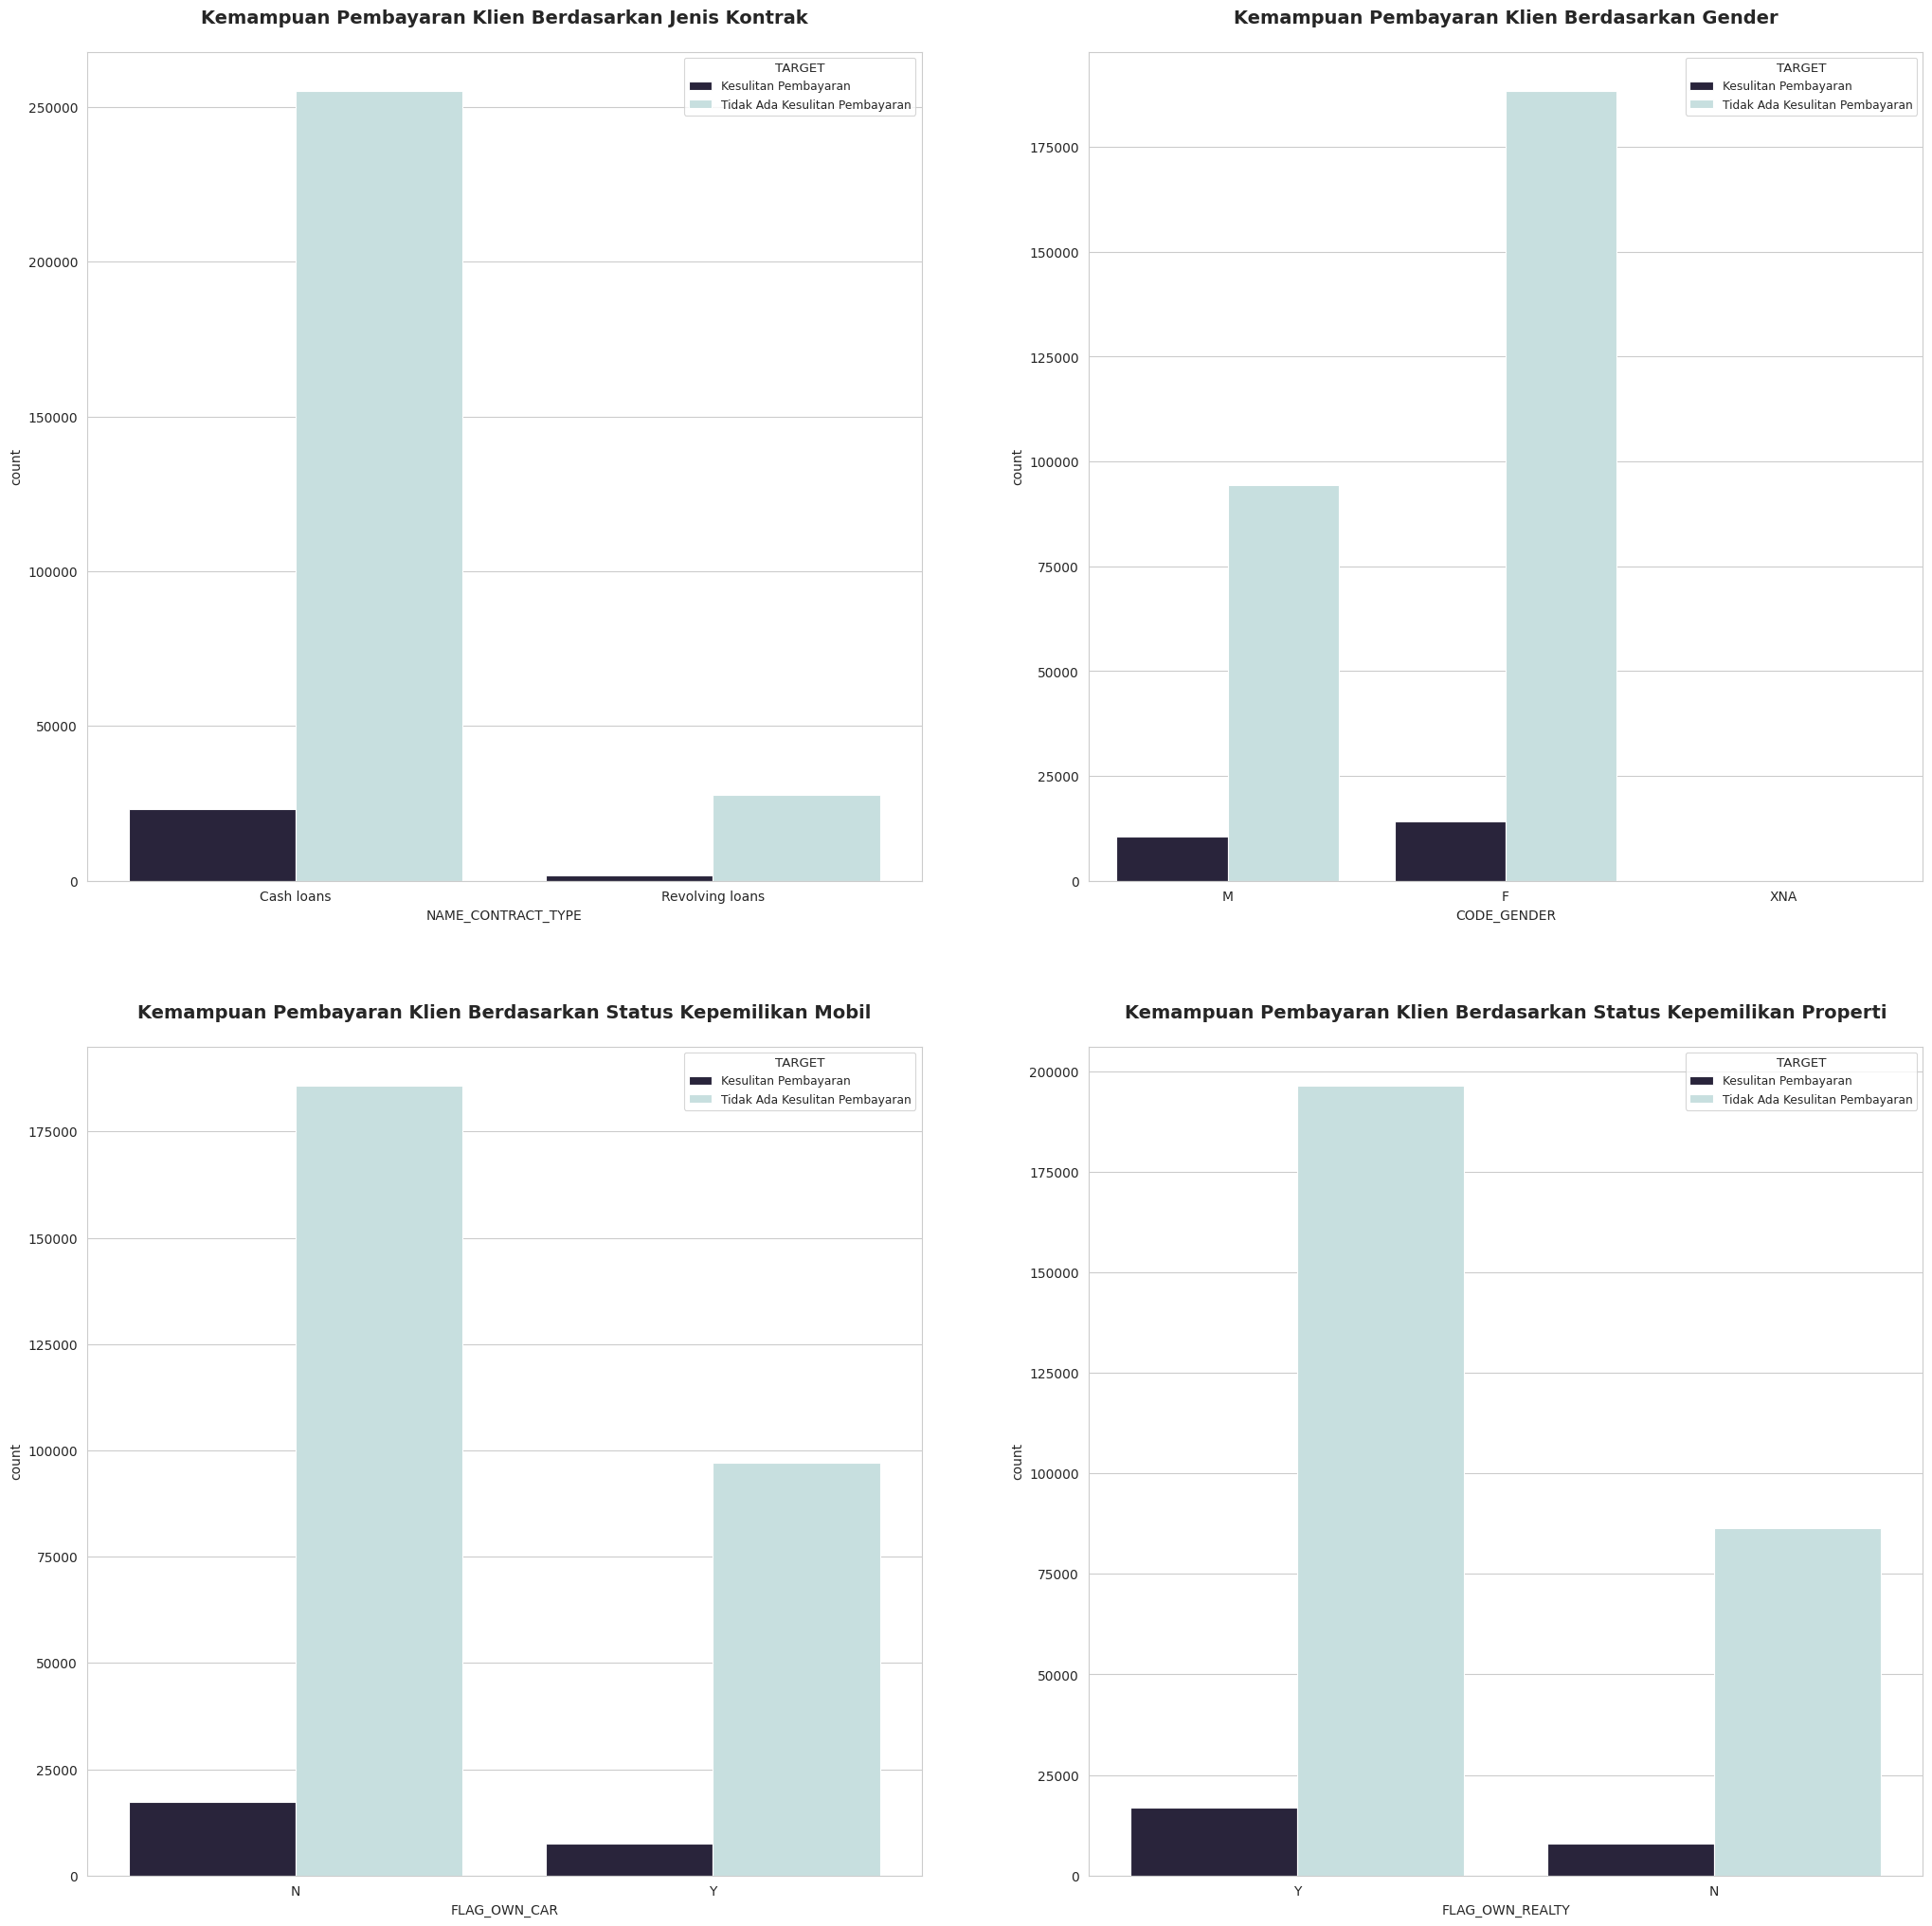

In [11]:
# Hapus data yang tidak dapat digunakan untuk tampilan bar chart
filtered_train = train[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TARGET']].copy()

# Visualization pt 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('paper', font_scale=1)

# Bar Chart untuk Jenis Kontrak
ax[0][0].set_title('Kemampuan Pembayaran Klien Berdasarkan Jenis Kontrak\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data=filtered_train, hue='TARGET', palette='ch:start=0.2,rot=-.3_r', ax=ax[0][0])

# Bar Chart untuk Gender
ax[0][1].set_title('Kemampuan Pembayaran Klien Berdasarkan Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data=filtered_train, hue='TARGET', palette='ch:start=0.2,rot=-.3_r', ax=ax[0][1])

# Bar Chart untuk Status Kepemilikan Mobil
ax[1][0].set_title('\nKemampuan Pembayaran Klien Berdasarkan Status Kepemilikan Mobil\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data=filtered_train, hue='TARGET', palette='ch:start=0.2,rot=-.3_r', ax=ax[1][0])

# Bar Chart untuk Status Kepemilikan Properti
ax[1][1].set_title('\nKemampuan Pembayaran Klien Berdasarkan Status Kepemilikan Properti\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data=filtered_train, hue='TARGET', palette='ch:start=0.2,rot=-.3_r', ax=ax[1][1])

plt.show()

Berdasarkan hasil visualisasi di atas, bisnis dapat mengoptimalkan strategi pemasaran dan penawaran produk untuk menargetkan kelompok pelanggan dengan tingkat pembayaran yang baik, seperti wanita atau pelanggan yang tidak memiliki mobil. Analisis lebih lanjut dapat dilakukan untuk memahami faktor-faktor lain yang dapat mempengaruhi kemampuan pembayaran klien, seperti riwayat kredit atau jenis pekerjaan.

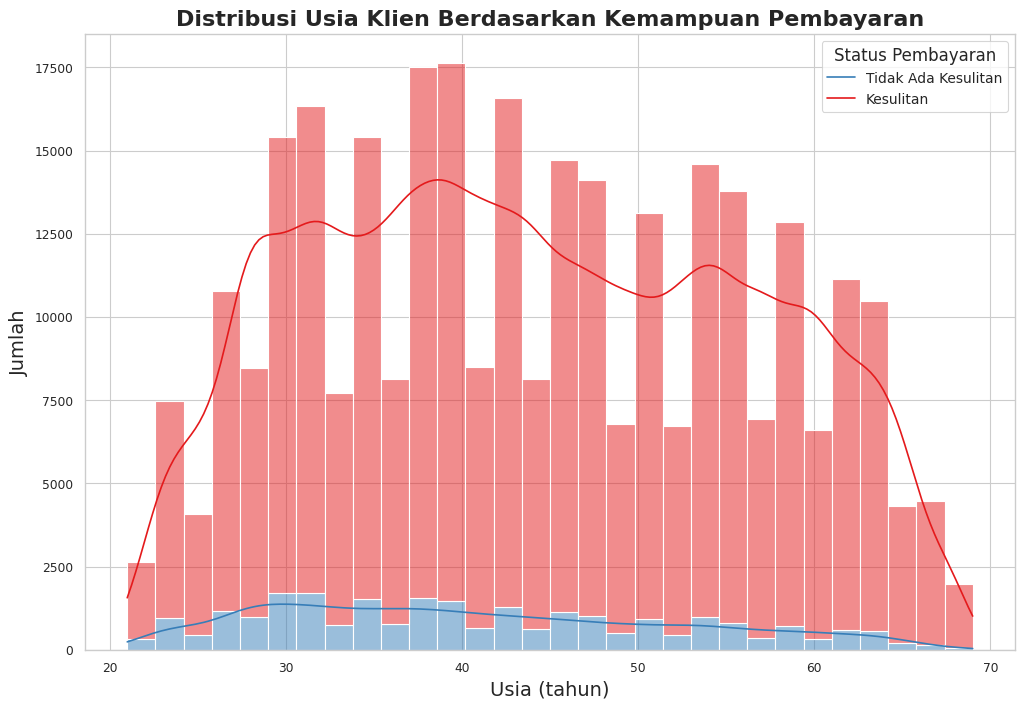

In [13]:
# Ukuran dan gaya plot
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.set_palette('Set1')

# Plot histogram dengan kernel density estimation (KDE)
sns.histplot(data=df_train, x=round(df_train['DAYS_BIRTH'] / -365), bins=30, kde=True, hue='TARGET', multiple='stack')

# Penambahan label dan judul
plt.title('Distribusi Usia Klien Berdasarkan Kemampuan Pembayaran', fontsize=16, fontweight='bold')
plt.xlabel('Usia (tahun)', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.legend(title='Status Pembayaran', labels=['Tidak Ada Kesulitan', 'Kesulitan'], title_fontsize='12', fontsize='10')

# Menampilkan plot
plt.show()

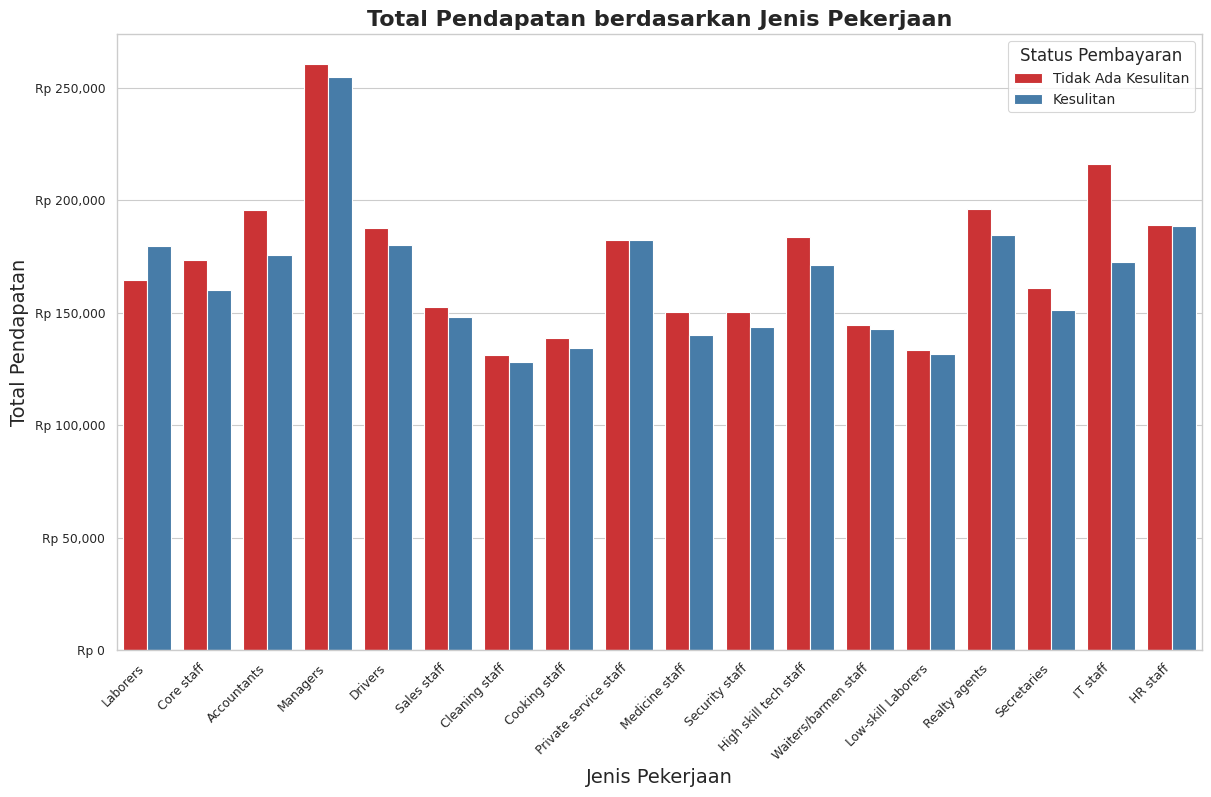

In [14]:
# Ukuran dan gaya plot
plt.figure(figsize=(14, 8))
sns.set_style('whitegrid')
sns.set_palette('Set1')

# Plot bar dengan palette berdasarkan status pembayaran
sns.barplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', data=df_train, hue='TARGET', ci=None)

# Menambahkan judul dan label
plt.title('Total Pendapatan berdasarkan Jenis Pekerjaan', fontsize=16, fontweight='bold')
plt.xlabel('Jenis Pekerjaan', fontsize=14)
plt.ylabel('Total Pendapatan', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Menyusun label pekerjaan untuk keterbacaan yang lebih baik

# Menambahkan keterangan pada sumbu y dengan format rupiah
from matplotlib.ticker import FuncFormatter

def format_rupiah(x, _):
    return f"Rp {x:,.0f}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_rupiah))

# Menambahkan legenda dengan label yang jelas
plt.legend(title='Status Pembayaran', labels=['Tidak Ada Kesulitan', 'Kesulitan'], title_fontsize='12', fontsize='10')

# Menampilkan plot
plt.show()

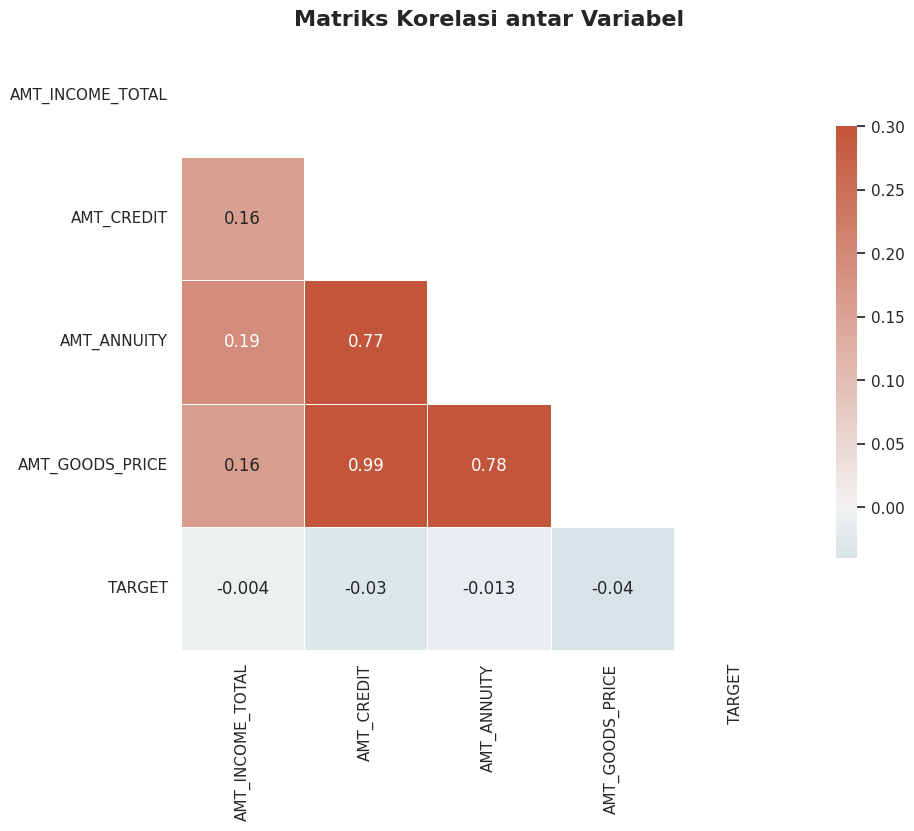

In [15]:
# Pilih subset kolom yang ingin divisualisasikan
columns_to_visualize = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']

# Buat matriks korelasi
correlation_matrix = df_train[columns_to_visualize].corr()

# Atur gaya plot
sns.set(style="white")

# Buat mask untuk sel atas segitiga
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Tentukan palet warna
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Buat ukuran plot
plt.figure(figsize=(10, 8))

# Plot matriks korelasi dengan heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

# Tambahkan judul
plt.title("Matriks Korelasi antar Variabel", fontsize=16, fontweight='bold')

# Tampilkan plot
plt.show()

#### **Visualization Suite Type VS Target**

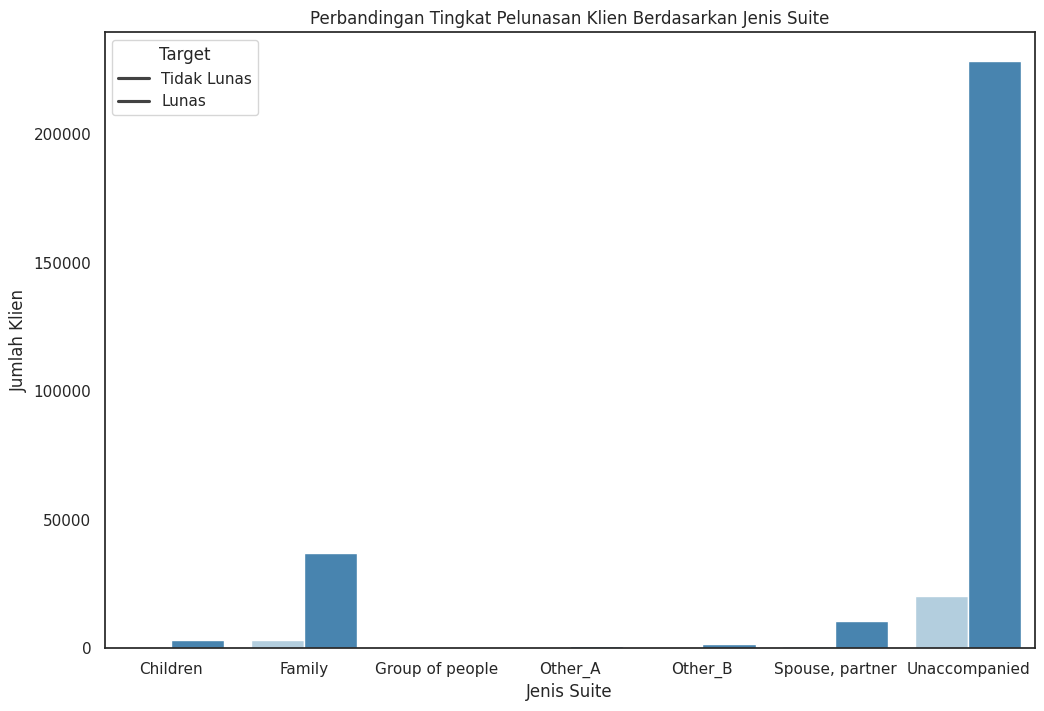

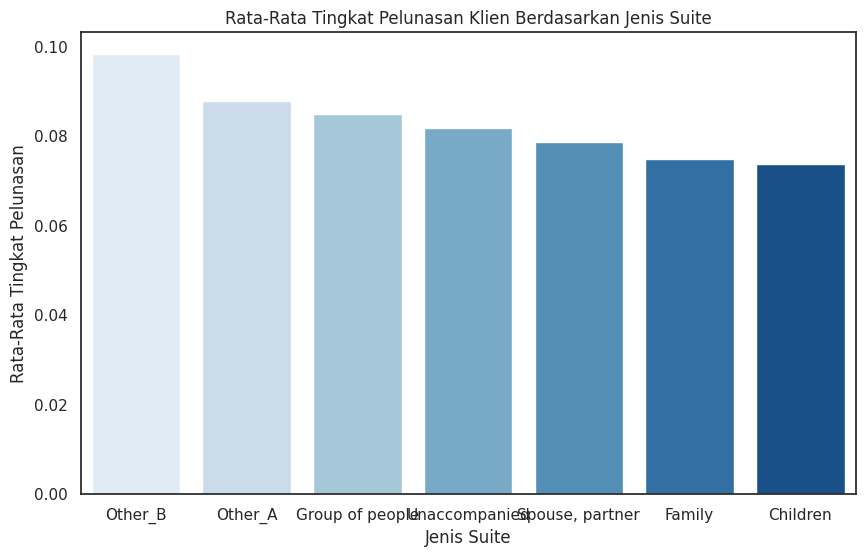

Insight Bisnis:
1. Jenis Suite dengan jumlah klien terbanyak:
Unaccompanied

2. Jenis Suite dengan tingkat pelunasan tertinggi:
Other_B


In [16]:
# Grouping data
st = train.groupby(by=['NAME_TYPE_SUITE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Plotting bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='NAME_TYPE_SUITE', y='SK_ID_CURR', hue='TARGET', data=st, palette='Blues')
plt.title('Perbandingan Tingkat Pelunasan Klien Berdasarkan Jenis Suite')
plt.xlabel('Jenis Suite')
plt.ylabel('Jumlah Klien')
plt.legend(title='Target', labels=['Tidak Lunas', 'Lunas'])
plt.show()

# Menampilkan rata-rata tingkat pelunasan untuk setiap jenis suite
avg_repayment_by_suite = df_train[['NAME_TYPE_SUITE', 'TARGET']].groupby(['NAME_TYPE_SUITE'], as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

# Menampilkan bar chart untuk rata-rata tingkat pelunasan
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_TYPE_SUITE', y='TARGET', data=avg_repayment_by_suite, palette='Blues')
plt.title('Rata-Rata Tingkat Pelunasan Klien Berdasarkan Jenis Suite')
plt.xlabel('Jenis Suite')
plt.ylabel('Rata-Rata Tingkat Pelunasan')
plt.show()

# Menampilkan insight bisnis
print("Insight Bisnis:")
print("1. Jenis Suite dengan jumlah klien terbanyak:")
print(st.groupby('NAME_TYPE_SUITE')['SK_ID_CURR'].sum().idxmax())
print("\n2. Jenis Suite dengan tingkat pelunasan tertinggi:")
print(avg_repayment_by_suite.iloc[0]['NAME_TYPE_SUITE'])

#### **Visualization Income Type VS Target**

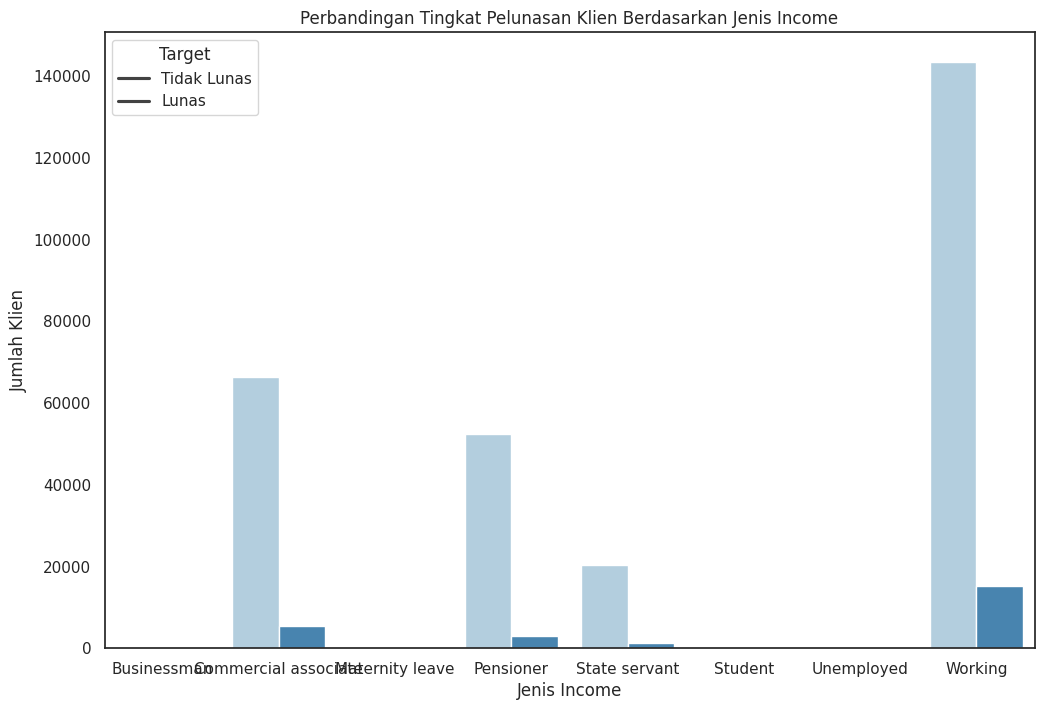

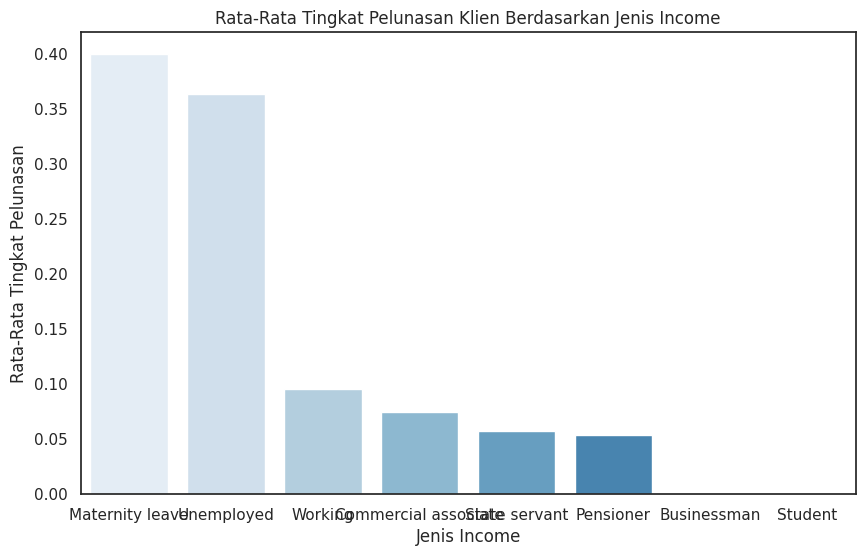

Insight Bisnis:
1. Jenis Income dengan jumlah klien terbanyak:
Working

2. Jenis Income dengan tingkat pelunasan tertinggi:
Maternity leave


In [17]:
# Grouping data
st = train.groupby(by=['NAME_INCOME_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Plotting bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='NAME_INCOME_TYPE', y='SK_ID_CURR', hue='TARGET', data=st, palette='Blues')
plt.title('Perbandingan Tingkat Pelunasan Klien Berdasarkan Jenis Income')
plt.xlabel('Jenis Income')
plt.ylabel('Jumlah Klien')
plt.legend(title='Target', labels=['Tidak Lunas', 'Lunas'])
plt.show()

# Menampilkan rata-rata tingkat pelunasan untuk setiap jenis Income
avg_repayment_by_income = df_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'], as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

# Menampilkan bar chart untuk rata-rata tingkat pelunasan
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_INCOME_TYPE', y='TARGET', data=avg_repayment_by_income, palette='Blues')
plt.title('Rata-Rata Tingkat Pelunasan Klien Berdasarkan Jenis Income')
plt.xlabel('Jenis Income')
plt.ylabel('Rata-Rata Tingkat Pelunasan')
plt.show()

# Menampilkan insight bisnis
print("Insight Bisnis:")
print("1. Jenis Income dengan jumlah klien terbanyak:")
print(st.groupby('NAME_INCOME_TYPE')['SK_ID_CURR'].sum().idxmax())
print("\n2. Jenis Income dengan tingkat pelunasan tertinggi:")
print(avg_repayment_by_income.iloc[0]['NAME_INCOME_TYPE'])

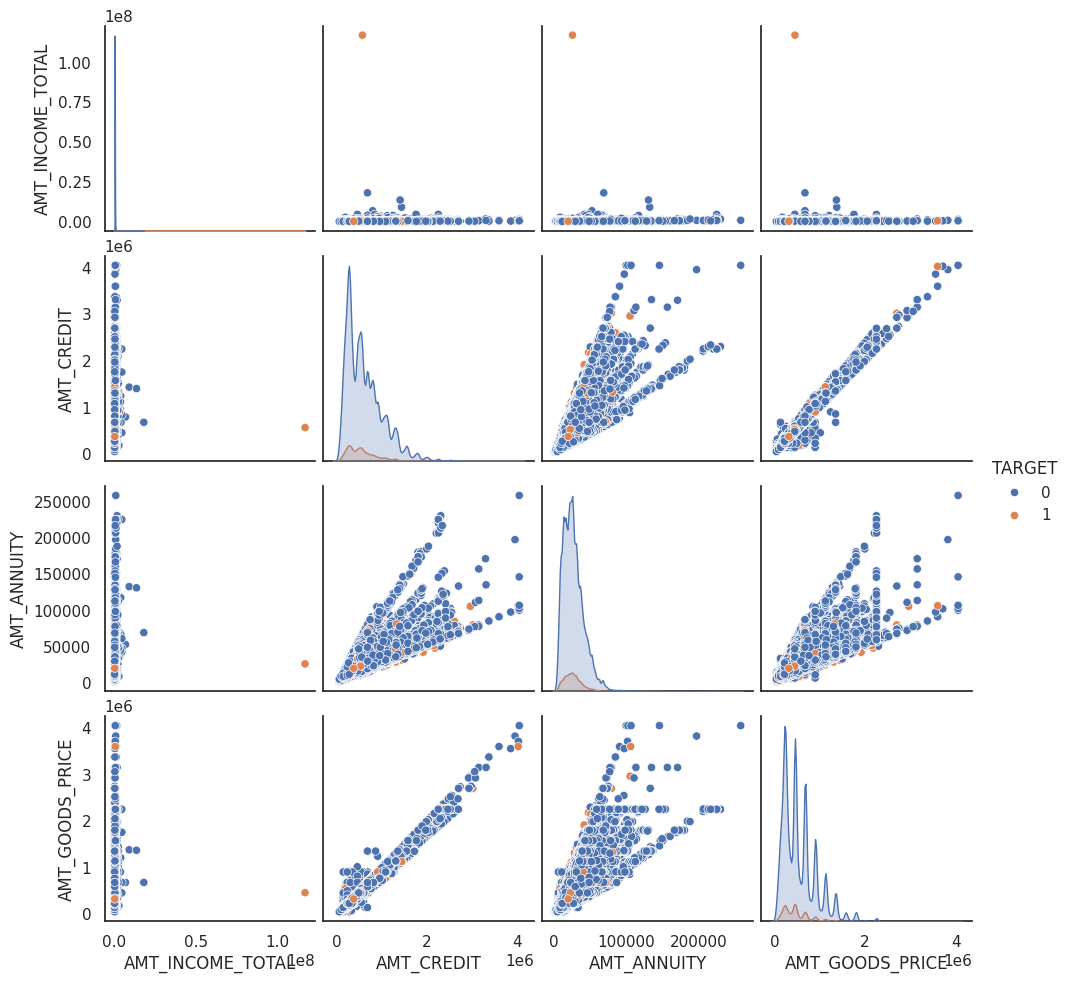

In [18]:
# SHOW CORRELATION BETWEEN TARGET to Income, Credit, Annuity, Goods Price
columns_to_visualize = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',]
sns.pairplot(df_train[columns_to_visualize + ['TARGET']], hue='TARGET')
plt.show()

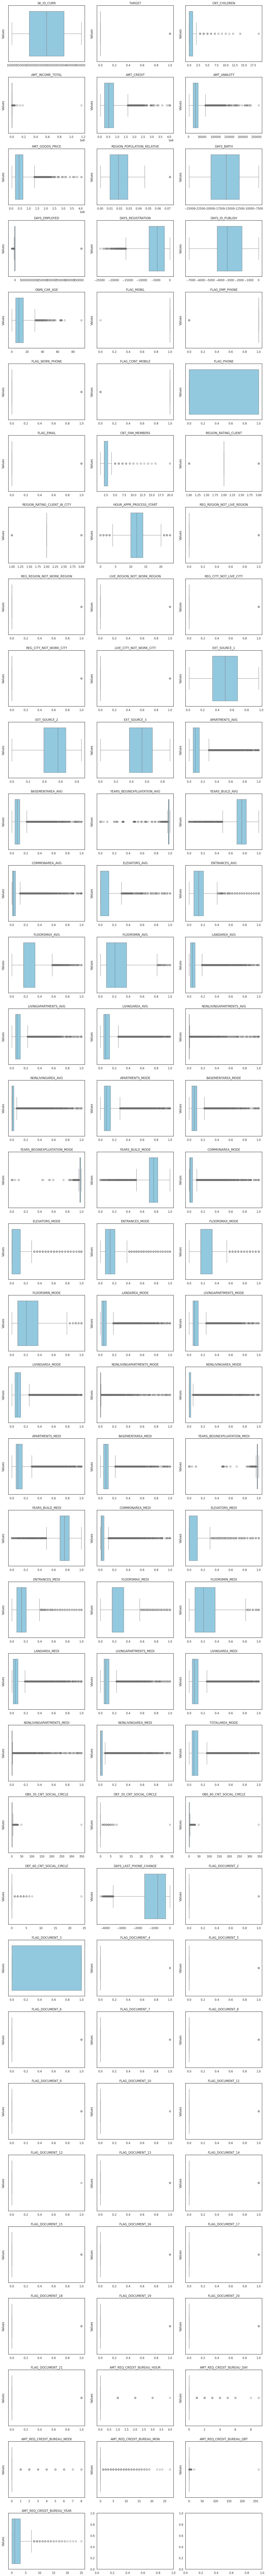

In [19]:
# Get numeric columns
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots dynamically based on the number of numeric columns
num_cols_per_subplot = 3
num_rows = (len(numeric_columns) - 1) // num_cols_per_subplot + 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols_per_subplot, figsize=(15, 4 * num_rows))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axs = axs.ravel()

# Loop through numeric columns and create box plots with seaborn for a cleaner look
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df_train, x=df_train[col], ax=axs[i], color='skyblue')
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


#### **Multivariat Visualization**

**1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status**

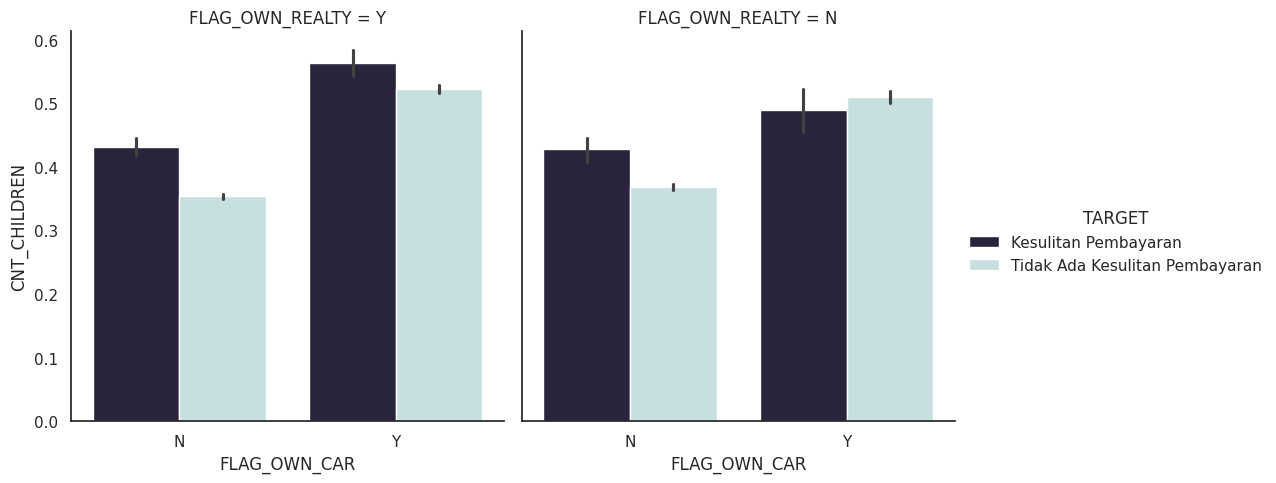

In [20]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)
plt.show()

**2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status**

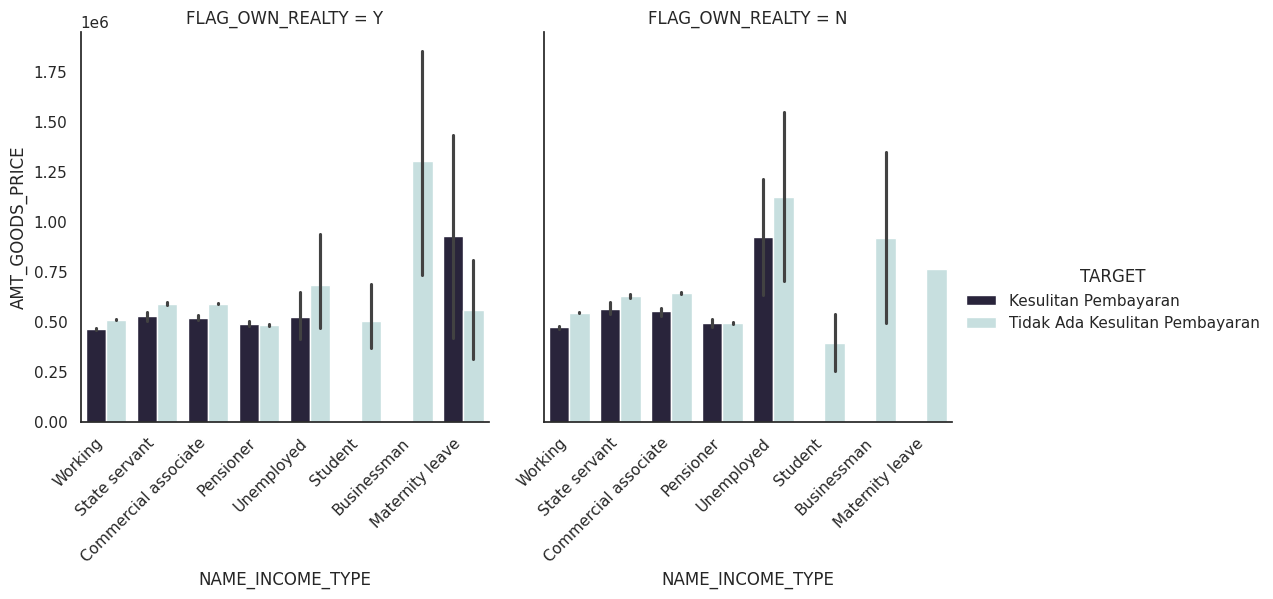

In [21]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

**3. Family Status, Amount of Income, Target, and House/Flat Ownership Status**

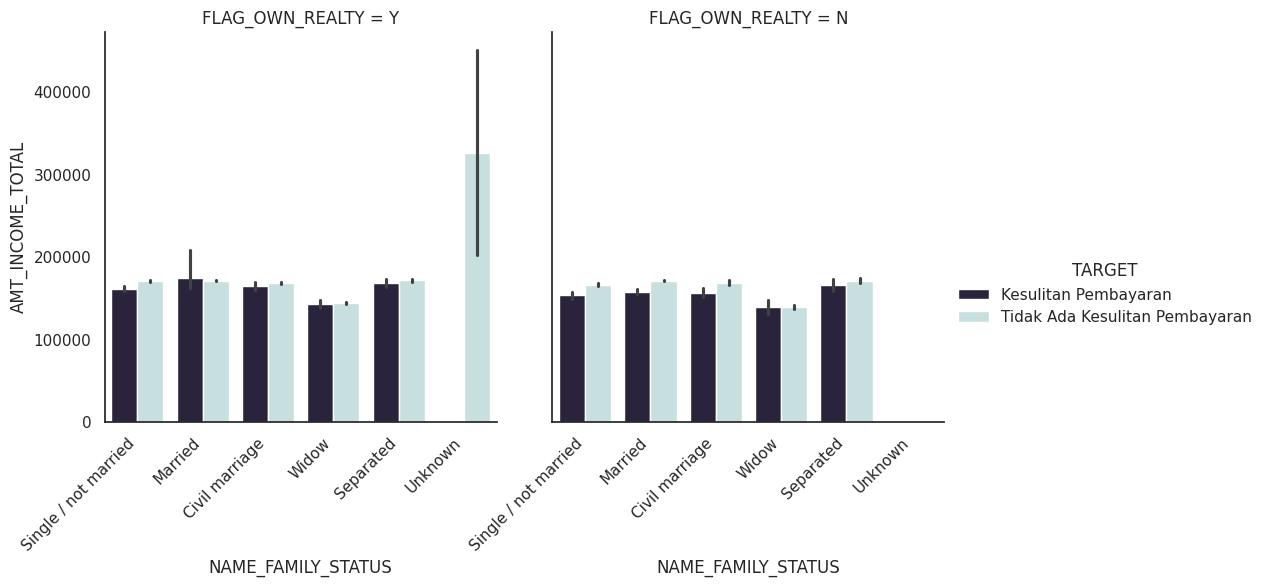

In [22]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

#### **Grouped by Contract Type**

**1. Income Type, Amount of Credit, Target, and Contract Type**

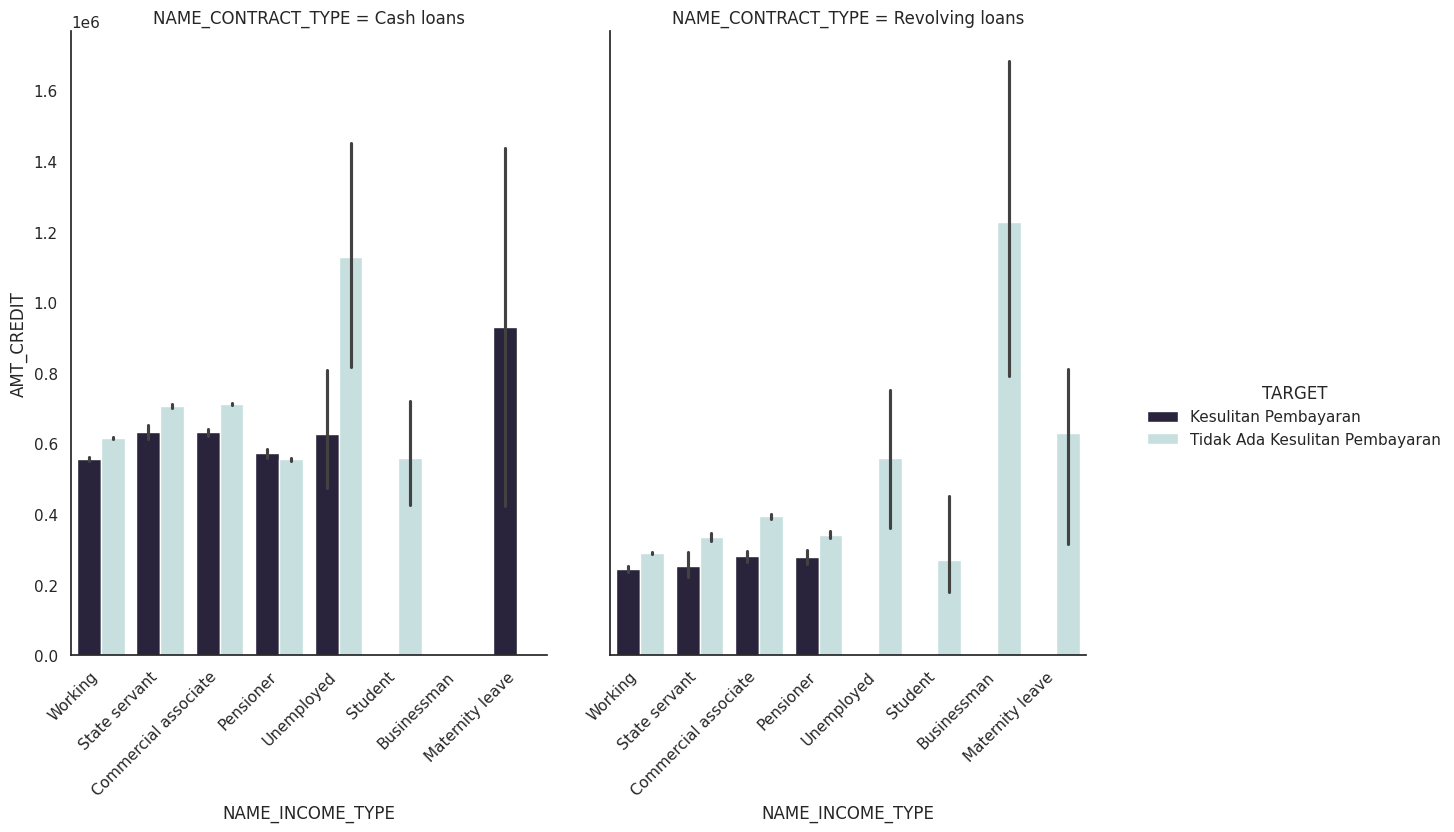

In [23]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'NAME_CONTRACT_TYPE',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

## **Preprocessing Model Train**

#### **Fuction**

In [24]:
# handling
# outlier
def outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [26]:
print('Count Null Train',df_train.isna().sum().sum())
print('Count Null Test',df_test.isna().sum().sum())

Count Null Train 9152465
Count Null Test 1404419


In [27]:
## ** PREPROCESSING NULL VALUES TRAIN**
#DECLARE NUMERICAL AND CATEGORICAL COLUMNS
cat_col_train = df_train.select_dtypes(include=['object']).columns
num_col_train = df_train.select_dtypes(include=['int64', 'float64']).columns

#REPLACE NaN WITH MODE, when the data is categorical
# Impute missing values for categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_train[cat_col_train] = categorical_imputer.fit_transform(df_train[cat_col_train])

#REPLACE NaN WITH MEAN, when the data is numerical
# Impute missing values for numeric columns with median
numeric_imputer = SimpleImputer(strategy='median')
df_train[num_col_train] = numeric_imputer.fit_transform(df_train[num_col_train])

## ** PREPROCESSING NULL VALUES TRAIN**
#DECLARE NUMERICAL AND CATEGORICAL COLUMNS
cat_col_test = df_test.select_dtypes(include=['object']).columns
num_col_test = df_test.select_dtypes(include=['int64', 'float64']).columns

#REPLACE NaN WITH MODE, when the data is categorical
# Impute missing values for categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_test[cat_col_test] = categorical_imputer.fit_transform(df_test[cat_col_test])

#REPLACE NaN WITH MEAN, when the data is numerical
# Impute missing values for numeric columns with median
numeric_imputer = SimpleImputer(strategy='median')
df_test[num_col_test] = numeric_imputer.fit_transform(df_test[num_col_test])

In [28]:
print('Result Count Null Train',df_train.isna().sum().sum())
print('Result Count Null Test',df_test.isna().sum().sum())

Result Count Null Train 0
Result Count Null Test 0


In [29]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,9.0,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,9.0,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.

In [30]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001.0,Cash loans,F,N,Y,0.0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241.0,-2329.0,-5170.0,-812.0,9.0,1.0,1.0,0.0,1.0,0.0,1.0,Laborers,2.0,2.0,2.0,TUESDAY,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,0.7552,0.0227,0.00,0.1379,0.1250,0.2083,0.0483,0.0756,0.0505,0.0000,0.0038,0.0672,0.0612,0.9732,0.7583,0.0203,0.0000,0.1379,0.1250,0.2083,0.0462,0.0817,0.0526,0.0000,0.0012,0.0666,0.0590,0.9732,0.7585,0.0223,0.00,0.1379,0.1250,0.2083,0.0488,0.0770,0.0514,0.0000,0.0031,reg oper account,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005.0,Cash loans,M,N,Y,0.0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064.0,-4469.0,-9118.0,-1623.0,9.0,1.0,1.0,0.0,1.0,0.0,0.0,Low-skill Laborers,2.0,2.0,2.0,FRIDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,0.564990,0.291656,0.432962,0.0928,0.0781,0.9816,0.7552,0.0227,0.00,0.1379,0.1667,0.2083,0.0483,0.0756,0.0770,0.0000,0.0038,0.0851,0.0770,0.9816,0.7583,0.0203,0.0000,0.1379,0.1667,0.2083,0.0462,0.0817,0.0751,0.0000,0.0012,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,0.0770,0.0776,0.0000,0.0031,reg oper account,block of flats,0.0707,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013.0,Cash loans,M,Y,Y,0.0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,-20038.0,-4458.0,-2175.0,-3503.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,Drivers,2.0,2.0,2.0,MONDAY,14.0,0.0,0.0,0.0,0.

#### **Drop Duplicate Data**

In [31]:
# detecting duplicate data
print('Duplicate data train is:', df_train.duplicated().sum())
print('Duplicate data test is:', df_test.duplicated().sum())

Duplicate data train is: 0
Duplicate data test is: 0


Because the gender have 3 entity instead 2, we should drop entity XNA

In [32]:
# Filter out data Not M or F
valid_genders = ['M', 'F']
df_train = df_train[df_train['CODE_GENDER'].isin(valid_genders)]
df_test = df_test[df_test['CODE_GENDER'].isin(valid_genders)]

# Drop rows with NaN values from both training and test DataFrames
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

## **Encoding**

#### **Check Column with Categorical & Numerical Data**

In [33]:
# SHOW COLUMN WITH CATEGORICAL DATA
categorical_columns = df_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique values: {df_train[col].unique()}")

Column: NAME_CONTRACT_TYPE
Unique values: ['Cash loans' 'Revolving loans']
Column: CODE_GENDER
Unique values: ['M' 'F']
Column: FLAG_OWN_CAR
Unique values: ['N' 'Y']
Column: FLAG_OWN_REALTY
Unique values: ['Y' 'N']
Column: NAME_TYPE_SUITE
Unique values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Column: NAME_INCOME_TYPE
Unique values: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Column: NAME_EDUCATION_TYPE
Unique values: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Column: NAME_FAMILY_STATUS
Unique values: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Column: NAME_HOUSING_TYPE
Unique values: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Column: OCCUPATION_TYPE
Unique values: ['Laborers' 'Core 

In [34]:
# SHOW COLUMN WITH NUMERICAL DATA
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    print(f"Column: {col}")

Column: SK_ID_CURR
Column: TARGET
Column: CNT_CHILDREN
Column: AMT_INCOME_TOTAL
Column: AMT_CREDIT
Column: AMT_ANNUITY
Column: AMT_GOODS_PRICE
Column: REGION_POPULATION_RELATIVE
Column: DAYS_BIRTH
Column: DAYS_EMPLOYED
Column: DAYS_REGISTRATION
Column: DAYS_ID_PUBLISH
Column: OWN_CAR_AGE
Column: FLAG_MOBIL
Column: FLAG_EMP_PHONE
Column: FLAG_WORK_PHONE
Column: FLAG_CONT_MOBILE
Column: FLAG_PHONE
Column: FLAG_EMAIL
Column: CNT_FAM_MEMBERS
Column: REGION_RATING_CLIENT
Column: REGION_RATING_CLIENT_W_CITY
Column: HOUR_APPR_PROCESS_START
Column: REG_REGION_NOT_LIVE_REGION
Column: REG_REGION_NOT_WORK_REGION
Column: LIVE_REGION_NOT_WORK_REGION
Column: REG_CITY_NOT_LIVE_CITY
Column: REG_CITY_NOT_WORK_CITY
Column: LIVE_CITY_NOT_WORK_CITY
Column: EXT_SOURCE_1
Column: EXT_SOURCE_2
Column: EXT_SOURCE_3
Column: APARTMENTS_AVG
Column: BASEMENTAREA_AVG
Column: YEARS_BEGINEXPLUATATION_AVG
Column: YEARS_BUILD_AVG
Column: COMMONAREA_AVG
Column: ELEVATORS_AVG
Column: ENTRANCES_AVG
Column: FLOORSMAX_AVG
C

#### **Replace Data Train Categorical to Numberical**

In [35]:
#DF_TRAIN ENCODED
df_train_en = df_train.copy()

In [36]:
# Replace categorical values with numerical labels (0, 1, 2)
for col in categorical_columns:
    df_train_en[col] = pd.Categorical(df_train_en[col])
    df_train_en[col] = df_train_en[col].cat.codes

# Columns to exclude from scaling
columns_to_exclude = ['SK_ID_CURR', 'TARGET']

# Apply StandardScaler to numeric columns (excluding specific columns)
scaler = StandardScaler()
for col in numeric_columns:
    if col not in columns_to_exclude:
        df_train_en[col] = scaler.fit_transform(df_train_en[[col]])


In [37]:
df_train_en.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,0,1,0,1,-0.577534,0.142129,-0.478099,-0.166149,-0.507239,6,7,4,3,1,-0.149444,1.506889,-0.456219,0.379840,0.579152,-0.146313,0.001803,0.468701,-0.498997,0.043245,1.599374,-0.245217,8,-1.265716,-0.103059,-0.062693,6,-0.631813,-0.124005,-0.231268,-0.20587,-0.29121,-0.547240,-0.467818,5,-3.021864,-1.317935,-2.153683,-1.002385,-0.831646,-0.174888,-2.059883,-0.322132,-0.368516,-1.056907,-1.061571,-0.986110,-0.354336,-1.187143,-0.901459,-0.100846,-0.305256,-0.954020,-0.762146,-0.152956,-2.022140,-0.276724,-0.355994,-1.017910,-1.054493,-0.976136,-0.299971,-1.132309,-0.86416,-0.095487,-0.260797,-0.983926,-0.824939,-0.173134,-2.054299,-0.314120,-0.365351,-1.050296,-1.057413,-0.982013,-0.351888,-1.180438,-0.893699,-0.099729,-0.295540,2,0,-0.902011,5,0,0.242883,4.164042,0.252154,5.254315,-0.206989,-0.006502,0.639051,-0.009017,-0.123883,-0.31074,-0.013853,-0.297634,-0.062539,-0.004771,-0.06267,-0.00255,-0.059478,-0.054269,-0.034802,-0.100139,-0.016332,-0.090535,-0.024402,-0.022529,-0.018305,-0.070988,-0.058766,-0.155839,-0.269942,-0.308618,-0.440916
1,100003.0,0.0,0,0,0,0,-0.577534,0.426790,1.725436,0.592674,1.600865,1,4,1,1,1,-1.252739,-0.166814,-0.460119,1.078701,1.790850,-0.146313,0.001803,0.468701,-0.498997,0.043245,1.599374,-0.245217,3,-0.167630,-2.067566,-2.051807,1,-0.325612,-0.124005,-0.231268,-0.20587,-0.29121,-0.547240,-0.467818,39,-1.384731,0.564486,0.112048,-0.082637,-0.532204,0.129151,0.636085,0.749601,0.431099,-1.544569,0.890450,1.273925,-0.809464,-0.117407,-0.451272,0.045222,-0.101708,-0.084016,-0.478646,0.125838,0.641739,0.558453,0.468754,-1.502151,0.919220,1.291807,-0.770249,-0.125943,-0.42262,-0.095487,-0.260797,-0.065132,-0.524568,0.127494,0.633850,0.760028,0.436165,-1.536561,0.890289,1.270772,-0.809084,-0.103308,-0.443077,0.047354,-0.089822,2,0,-

#### **Replace Data Test Categorical to Numberical**

In [38]:
#DF_TEST ENCODED
df_test_en = df_test.copy()

In [39]:
# Replace categorical values with numerical labels (0, 1, 2)
for col in categorical_columns:
    df_test_en[col] = pd.Categorical(df_test_en[col])
    df_test_en[col] = df_test_en[col].cat.codes

# Columns to exclude from scaling
columns_to_exclude = ['SK_ID_CURR', 'TARGET']

# Apply StandardScaler to numeric columns (excluding specific columns)
scaler = StandardScaler()
for col in numeric_columns:
    if col not in columns_to_exclude:
        df_test_en[col] = scaler.fit_transform(df_test_en[[col]])


In [40]:
df_test_en.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001.0,0,0,0,1,-0.559988,-0.427809,0.142475,-0.553580,-0.037477,6,6,1,1,1,-0.164654,-0.733477,-0.483656,-0.056958,1.427241,-0.138436,0.004529,0.484762,-0.507337,0.040035,-0.597571,2.268994,8,-0.164830,-0.073004,-0.024421,5,1.828060,-0.138545,-0.241633,-0.209477,-0.289777,-0.538296,-0.459316,28,1.595754,1.498529,-2.000064,-0.510112,-0.449848,-0.192616,0.021144,-0.163231,-0.38942,-0.098598,-0.687052,-0.104367,-0.147290,-0.170974,-0.529847,-0.105151,-0.234492,-0.425522,-0.383755,-0.169347,-0.000145,-0.166439,-0.375376,-0.065267,-0.674336,-0.088777,-0.151755,-0.156484,-0.476833,-0.099590,-0.241554,-0.499307,-0.445273,-0.191190,0.021860,-0.164398,-0.385774,-0.094290,-0.683841,-0.102249,-0.148453,-0.167466,-0.521792,-0.103587,-0.236666,2,0,-0.610590,5,0,-0.401091,-0.279167,-0.400896,-0.250398,-0.753470,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,-1.153865
1,100005.0,0,1,0,1,-0.559988,-0.782413,-0.804537,-0.752831,-0.839362,6,6,4,1,1,1.009586,-0.461392,-0.498482,-1.168264,0.910437,-0.138436,0.004529,0.484762,-0.507337,0.040035,-0.597571,-0.440724,9,-0.164830,-0.073004,-0.024421,0,-0.917400,-0.138545,-0.241633,-0.209477,-0.289777,-0.538296,-0.459316,42,0.393719,-1.248867,-0.410064,-0.183744,-0.095977,0.040930,0.021144,-0.163231,-0.38942,-0.098598,-0.313264,-0.104367,-0.147290,-0.170974,-0.215990,-0.105151,-0.234492,-0.209301,-0.094948,0.044781,-0.000145,-0.166439,-0.375376,-0.065267,-0.296365,-0.088777,-0.151755,-0.156484,-0.214466,-0.099590,-0.241554,-0.185770,-0.094693,0.040736,0.021860,-0.164398,-0.385774,-0.094290,-0.310396,-0.102249,-0.148453,-0.167466,-0.215855,-0.103587,-0.236666,2,0,-0.233614,4,0,-0.401091,-0.279167,-0.400896,-0.250398

#### **Handling Outliers**

In [41]:
# Columns to apply the outlier function to
columns_to_process = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED']

# Isolate the columns you want to process
selected_columns = df_train_en[columns_to_process]

# Apply the outlier function to selected columns
processed_columns = outlier(selected_columns)

# Replace the original columns with the processed columns
df_train_en[columns_to_process] = processed_columns
df_train_en.fillna(method='bfill',inplace=True)

#### **Handling Imbalance Data**

In [42]:
# Split the data into features (X_train) and target (y_train)
X_train = df_train_en.drop(['TARGET'], axis=1)
y_train = df_train_en['TARGET']

# Show Count of Target Variable
print('Target Variable Count:')
print(y_train.value_counts())

Target Variable Count:
0.0    282682
1.0     24825
Name: TARGET, dtype: int64


In [43]:
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('After applying SMOTE:')
print(y_train_resampled.value_counts())

After applying SMOTE:
1.0    282682
0.0    282682
Name: TARGET, dtype: int64


#### **Feature Selection**

In [44]:
df_test_en.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001.0,0,0,0,1,-0.559988,-0.427809,0.142475,-0.553580,-0.037477,6,6,1,1,1,-0.164654,-0.733477,-0.483656,-0.056958,1.427241,-0.138436,0.004529,0.484762,-0.507337,0.040035,-0.597571,2.268994,8,-0.164830,-0.073004,-0.024421,5,1.828060,-0.138545,-0.241633,-0.209477,-0.289777,-0.538296,-0.459316,28,1.595754,1.498529,-2.000064,-0.510112,-0.449848,-0.192616,0.021144,-0.163231,-0.38942,-0.098598,-0.687052,-0.104367,-0.147290,-0.170974,-0.529847,-0.105151,-0.234492,-0.425522,-0.383755,-0.169347,-0.000145,-0.166439,-0.375376,-0.065267,-0.674336,-0.088777,-0.151755,-0.156484,-0.476833,-0.099590,-0.241554,-0.499307,-0.445273,-0.191190,0.021860,-0.164398,-0.385774,-0.094290,-0.683841,-0.102249,-0.148453,-0.167466,-0.521792,-0.103587,-0.236666,2,0,-0.610590,5,0,-0.401091,-0.279167,-0.400896,-0.250398,-0.753470,0.0,0.520828,-0.010129,-0.122358,-0.309618,-0.006406,-0.311524,-0.06718,0.0,-0.034216,0.0,0.0,0.0,0.0,0.0,0.0,-0.039517,0.0,0.0,0.0,-0.042538,-0.036585,-0.048265,-0.078421,-0.711321,-1.153865
1,100005.0,0,1,0,1,-0.559988,-0.782413,-0.804537,-0.752831,-0.839362,6,6,4,1,1,1.009586,-0.461392,-0.498482,-1.168264,0.910437,-0.138436,0.004529,0.484762,-0.507337,0.040035,-0.597571,-0.440724,9,-0.164830,-0.073004,-0.024421,0,-0.917400,-0.138545,-0.241633,-0.209477,-0.289777,-0.538296,-0.459316,42,0.393719,-1.248867,-0.410064,-0.183744,-0.095977,0.040930,0.021144,-0.163231,-0.38942,-0.098598,-0.313264,-0.104367,-0.147290,-0.170974,-0.215990,-0.105151,-0.234492,-0.209301,-0.094948,0.044781,-0.000145,-0.166439,-0.375376,-0.065267,-0.296365,-0.088777,-0.151755,-0.156484,-0.214466,-0.099590,-0.241554,-0.185770,-0.094693,0.040736,0.021860,-0.164398,-0.385774,-0.094290,-0.310396,-0.102249,-0.148453,-0.167466,-0.215855,-0.103587,-0.236666,2,0,-0.233614,4,0,-0.401091,-0.279167,-0.400896,-0.250398

In [45]:
# Number of features to select
num_features_to_select = 60

# Initialize the SelectKBest feature selector using f_classif score function
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit the selector on the resampled training data and transform the features
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)

# Transform the test data using the same selector
X_test_selected = selector.transform(df_test_en)  # Drop 'SK_ID_CURR'

# Create DataFrames with selected features for both training and testing data
selected_features_train = df_train_en.drop(['TARGET'], axis=1).columns[selector.get_support()]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features_train)

selected_features_test = df_train_en.drop(['TARGET'], axis=1).columns[selector.get_support()]
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features_test)
X_test_selected_df['SK_ID_CURR'] = df_test_en['SK_ID_CURR']

# Append the 'SK_ID_CURR' and target columns back to the selected training data
X_train_selected_df['SK_ID_CURR'] = df_train_en['SK_ID_CURR']
X_train_selected_df['TARGET'] = y_train_resampled

# Now you have DataFrames with selected features, 'SK_ID_CURR', and the target column
X_train_selected_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,SK_ID_CURR,TARGET
0,0.0,1.0,0.0,1.0,-0.478099,-0.507239,7.0,4.0,3.0,-0.149444,1.506889,-0.456219,0.379840,0.579152,0.468701,-0.498997,1.599374,-0.103059,-0.062693,6.0,-0.631813,-0.29121,-0.547240,-0.467818,5.0,-3.021864,-1.317935,-2.153683,-1.002385,-0.831646,-0.368516,-1.061571,-0.986110,-1.187143,-0.901459,-0.305256,-0.954020,-0.355994,-1.054493,-0.976136,-1.132309,-0.86416,-0.260797,-0.983926,-0.824939,-0.365351,-1.057413,-0.982013,-1.180438,-0.893699,-0.295540,2.0,-0.902011,5.0,0.0,4.164042,5.254315,-0.206989,0.639051,-0.31074,100002.0,1.0
1,0.0,0.0,0.0,0.0,1.725436,1.600865,4.0,1.0,1.0,-1.252739,-0.166814,-0.460119,1.078701,1.790850,0.468701,-0.498997,1.599374,-2.067566,-2.051807,1.0,-0.325612,-0.29121,-0.547240,-0.467818,39.0,-1.384731,0.564486,0.112048,-0.082637,-0.532204,0.431099,0.890450,1.273925,-0.117407,-0.451272,-0.101708,-0.084016,0.468754,0.919220,1.291807,-0.125943,-0.42262,-0.260797,-0.065132,-0.524568,0.436165,0.890289,1.270772,-0.103308,-0.443077,-0.089822,2.0,-0.187817,0.0,0.0,-0.320487,-0.275675,0.163109,0.639051,-0.31074,100003.0,0.0
2,1.0,1.0,1.0,1.0,-1.152889,-1.092146,7.0,4.0,3.0,-0.783441,-0.689503,-0.453303,0.206119,0.306867,0.468701,2.004021,1.599374,-0.103059,-0.062693,1.0,-0.938014,-0.29121,-0.547240,-0.467818,11.0,0.012104,0.216952,1.223968,-0.189855,-0.094271,-0.368516,-0.280388,-0.082313,-0.149255,-0.205487,-0.230483,-0.192766,-0.355994,-0.264629,-0.069176,-0.159489,-0.20309,-0.238242,-0.198216,-0.094662,-0.365351,-0.277958,-0.081115,-0.151427,-0.207272,-0.231768,2.0,-0.220682,4.0,0.0,-0.320487,-0.275675,0.178832,-1.564821,-0.31074,100004.0,0.0
3,0.0,0.0,0.0,1.0,-0.711433,-0.653466,7.0,4.0,0.0,-0.928980,-0.680108,-0.473221,-1.375827,0.369142,0.468701,-0.498997,-0.625245,-0.103059,-0.062693,6.0,1.511593,-0.29121,-0.547240,-0.467818,5.0,0.012104,0.712209,0.112048,-0.189855,-0.094271,-0.368516,-0.280388,-0.082313,-0.149255,-0.205487,-0.230483,-0.192766,-0.355994,-0.264629,-0.069176,-0.159489,-0.20309,-0.238242,-0.198216,-0.094662,-0.365351,-0.277958,-0.081115,-0.151427,-0.207272,-0.231768,2.0,-0.220682,4.0,0.0,-0.320487,-0.275675,0.418307,0.639051,-0.31074,100006.0,0.0
4,0.0,1.0,0.0,1.0,-0.213740,-0.068558,7.0,4.0,3.0,0.563577,-0.892529,-0.473214,0.191642,-0.307263,0.468701,-0.498997,-0.625245,-0.103059,-0.062693,4.0,-0.325612,-0.29121,1.827351,2.137584,37.0,0.012104,-1.004686,0.112048,-0.189855,-0.094271,-0.368516,-0.280388,-0.082313,-0.149255,-0.205487,-0.230483,-0.192766,-0.355994,-0.264629,-0.069176,-0.159489,-0.20309,-0.238242,-0.198216,-0.094662,-0.365351,-0.277958,-0.081115,-0.151427,-0.207272,-0.231768,2.0,-0.220682,4.0,0.0,-0.320487,-0.275675,-0.173124,-1.564821,-0.31074,100007.0,0.0


In [46]:
X_test_selected_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,SK_ID_CURR
0,0.0,0.0,0.0,1.0,0.142475,-0.037477,6.0,1.0,1.0,-0.164654,-0.733477,-0.483656,-0.056958,1.427241,0.484762,-0.507337,-0.597571,-0.073004,-0.024421,5.0,1.828060,-0.289777,-0.538296,-0.459316,28.0,1.595754,1.498529,-2.000064,-0.510112,-0.449848,-0.38942,-0.687052,-0.104367,-0.170974,-0.529847,-0.234492,-0.425522,-0.375376,-0.674336,-0.088777,-0.156484,-0.476833,-0.241554,-0.499307,-0.445273,-0.385774,-0.683841,-0.102249,-0.167466,-0.521792,-0.236666,2.0,-0.610590,5.0,0.0,-0.279167,-0.250398,-0.753470,0.520828,-0.309618,100001.0
1,0.0,1.0,0.0,1.0,-0.804537,-0.839362,6.0,4.0,1.0,1.009586,-0.461392,-0.498482,-1.168264,0.910437,0.484762,-0.507337,-0.597571,-0.073004,-0.024421,0.0,-0.917400,-0.289777,-0.538296,-0.459316,42.0,0.393719,-1.248867,-0.410064,-0.183744,-0.095977,-0.38942,-0.313264,-0.104367,-0.170974,-0.215990,-0.234492,-0.209301,-0.375376,-0.296365,-0.088777,-0.156484,-0.214466,-0.241554,-0.185770,-0.094693,-0.385774,-0.310396,-0.102249,-0.167466,-0.215855,-0.236666,2.0,-0.233614,4.0,0.0,-0.279167,-0.250398,1.226251,0.520828,-0.309618,100005.0
2,0.0,1.0,1.0,1.0,0.401002,0.497113,6.0,1.0,1.0,-0.147258,-0.917718,-0.498406,0.786092,-0.287579,0.484762,-0.507337,-0.597571,-0.073004,-0.024421,1.0,0.607856,-0.289777,-0.538296,-0.459316,54.0,0.020733,1.002742,0.625136,-0.183744,-0.095977,-0.38942,-0.313264,-0.104367,-0.170974,-0.215990,-0.234492,-0.209301,-0.375376,-0.296365,-0.088777,-0.156484,-0.214466,-0.241554,-0.185770,-0.094693,-0.385774,-0.310396,-0.102249,-0.167466,-0.215855,-0.236666,2.0,-0.233614,4.0,0.0,-0.279167,-0.250398,0.252319,-1.920019,-0.309618,100013.0
3,0.0,0.0,0.0,1.0,2.896221,3.303709,6.0,4.0,1.0,0.358078,0.483623,-0.480449,0.835352,-0.736836,0.484762,-0.507337,1.673441,-0.073004,-0.024421,6.0,-0.307298,-0.289777,-0.538296,-0.459316,5.0,0.142220,-0.046070,0.635096,2.402845,2.114329,2.63839,1.553883,-1.832820,2.669794,3.222227,1.267678,2.518226,2.731020,1.591676,-1.821924,2.806222,3.372387,1.367676,2.412970,2.135593,2.650767,1.555040,-1.828706,2.683175,3.244030,1.290829,2.0,3.348266,4.0,0.0,-0.279167,-0.250398,-0.827425,0.520828,-0.309618,100028.0
4,0.0,1.0,1.0,0.0,0.297651,0.483748,6.0,4.0,1.0,-0.775825,0.699997,-0.482700,0.272381,-0.771247,0.484762,1.971078,-0.597571,-0.073004,-0.024421,0.0,-2.137605,-0.289777,1.857714,2.177152,5.0,-1.930888,-0.509431,0.090794,-0.183744,-0.095977,-0.38942,-0.313264,-0.104367,-0.170974,-0.215990,-0.234492,-0.209301,-0.375376,-0.296365,-0.088777,-0.156484,-0.214466,-0.241554,-0.185770,-0.094693,-0.385774,-0.310396,-0.102249,-0.167466,-0.215855,-0.236666,2.0,-0.233614,4.0,0.0,-0.279167,-0.250398,0.292141,0.520828,-0.309618,100038.0


#### **Split Data Train & Validation Data**

In [47]:
# Split the resampled training data into train and validation sets
X_train_selected_split, X_val_selected, y_train_split, y_val = train_test_split(
    X_train_selected, y_train_resampled, test_size=0.2, random_state=42
)
# record stats
print(f"Training Records = {X_train_selected_split.shape[0]} ; Validation Record {X_val_selected.shape[0]} ; Testing Record {X_test_selected.shape[0]}")

Training Records = 452291 ; Validation Record 113073 ; Testing Record 48744


## **Model Training Machine Learning**

### **Logistic Regression**

In [48]:
# Train a LogisticRegression model on the selected features
logreg_classifier = LogisticRegression(random_state=42,verbose=1, n_jobs=-1, max_iter=200, C=0.5, penalty='l1', solver='liblinear', class_weight='balanced')
logreg_classifier.fit(X_train_selected_split, y_train_split)

# Make predictions on the test data
y_test_pred = logreg_classifier.predict(X_test_selected)

[LibLinear]

#### **Prediction Data Validation**

In [49]:
# Make predictions on the validation set
y_val_pred = logreg_classifier.predict(X_val_selected)

# Calculate accuracy, precision, recall, and F1 score on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Validation Accuracy: 0.76
Precision: 0.76
Recall: 0.78
F1 Score: 0.77


#### **Visualization Confusion Matrix**

Confusion Matrix:
[[41989 14360]
 [12388 44336]]


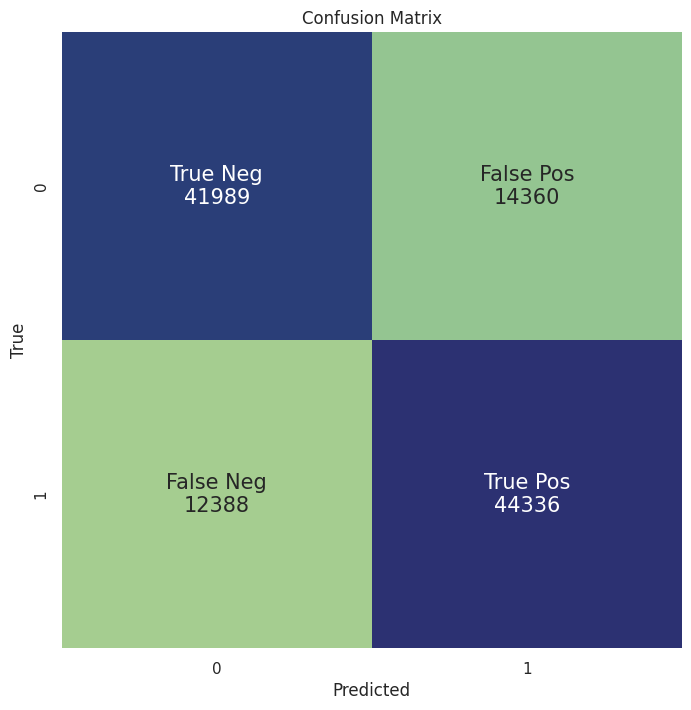

In [50]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap='crest', cbar=False, fmt='', annot_kws={"size": 15})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### **Classification Report**

In [51]:
# Define class names if applicable
class_names = ["Class 0", "Class 1"]

# Display classification report
class_report = classification_report(y_val, y_val_pred, target_names=class_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.75      0.76     56349
     Class 1       0.76      0.78      0.77     56724

    accuracy                           0.76    113073
   macro avg       0.76      0.76      0.76    113073
weighted avg       0.76      0.76      0.76    113073



#### **Visualization Y Score**

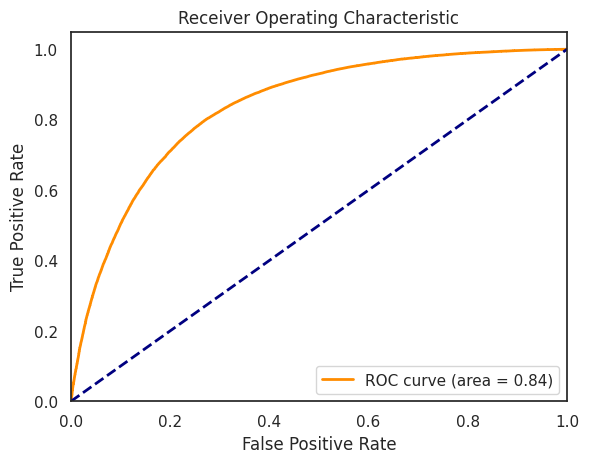

In [52]:
# y_scores = log.decision_function(X_test_selected)
y_scores = logreg_classifier.predict_proba(X_val_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **Random Forest**

In [53]:
# Train a RandomForestClassifier on the selected features
rf_classifier = RandomForestClassifier(random_state=42,verbose=1,n_jobs=-1)
rf_classifier.fit(X_train_selected_split, y_train_split)

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test_selected)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


#### **Prediction Data Validation**

In [54]:
# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val_selected)
# Calculate accuracy, precision, recall, and F1 score on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.3s finished


Validation Accuracy: 0.95
Precision: 1.00
Recall: 0.91
F1 Score: 0.95


#### **Visualization Confusion Matrix**

Confusion Matrix:
[[56190   159]
 [ 5294 51430]]


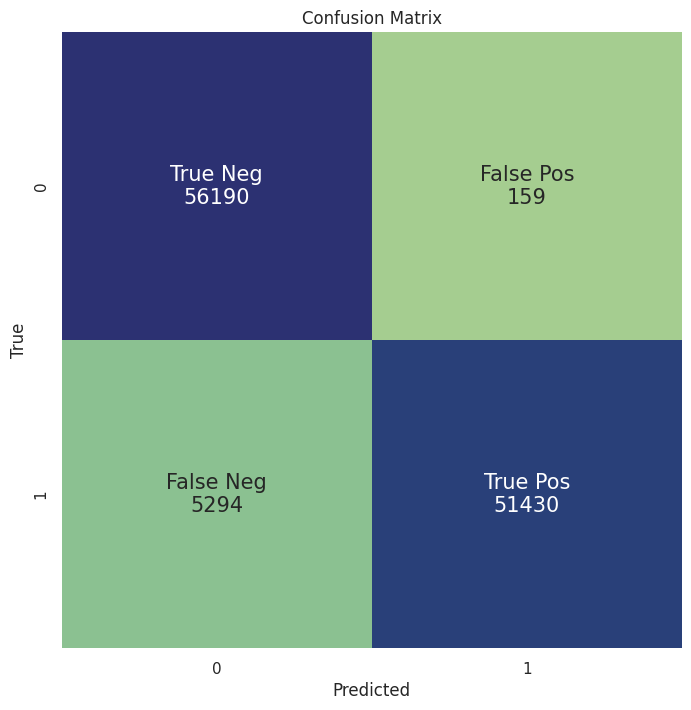

In [55]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap='crest', cbar=False, fmt='', annot_kws={"size": 15})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### **Classification Report**

In [56]:
# Define class names if applicable
class_names = ["Class 0", "Class 1"]

# Display classification report
class_report = classification_report(y_val, y_val_pred, target_names=class_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      1.00      0.95     56349
     Class 1       1.00      0.91      0.95     56724

    accuracy                           0.95    113073
   macro avg       0.96      0.95      0.95    113073
weighted avg       0.96      0.95      0.95    113073



#### **Visualization Y Score**

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.0s finished


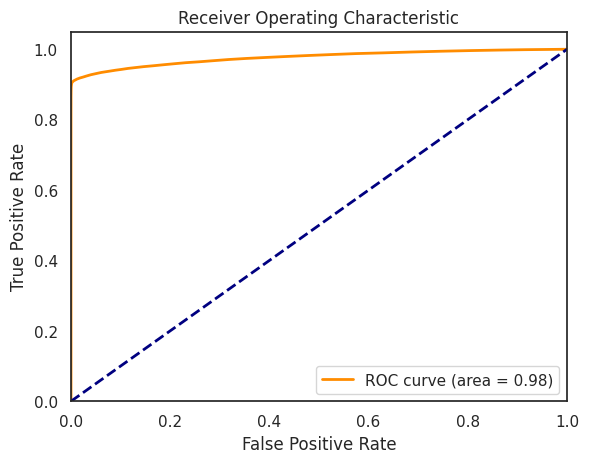

In [57]:
# y_scores = log.decision_function(X_test_selected)
y_scores = rf_classifier.predict_proba(X_val_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **Neural Network**

In [58]:
# define model params
input_shape = X_train_selected_split.shape[1]
nodes1 = np.ceil(2 * input_shape / 4).astype(int)
nodes2 = np.ceil(2 * input_shape / 3).astype(int)
nodes3 = np.ceil(2 * input_shape / 4).astype(int)
batch_size = np.ceil(len(X_train_selected_split) / 128).astype(int)

# build model
model = models.Sequential()
# input layer
model.add(layers.Dense(
                        batch_size
                       ,input_shape=(input_shape,)
                       ,name='input_layer'
                       ,activation='selu'))
# hidden layer
model.add(layers.Dense(
                        nodes1
                        ,name='hidden_nodes1'
                       ,activation='selu'))
# hidden layer
model.add(layers.Dense(
                        nodes2
                        ,name='hidden_nodes2'
                       ,activation='selu'))
# hidden layer
model.add(layers.Dense(
                        nodes3
                        ,name='hidden_nodes3'
                       ,activation='selu'))
# dropout layer
model.add(layers.Dropout(0.5))

# output layer
model.add(layers.Dense(
                        1  # Binary classification
                        ,name='output_layer'
                       ,activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 3534)              215574    
                                                                 
 hidden_nodes1 (Dense)       (None, 30)                106050    
                                                                 
 hidden_nodes2 (Dense)       (None, 40)                1240      
                                                                 
 hidden_nodes3 (Dense)       (None, 30)                1230      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 324125 (1.24 MB)
Trainable params: 324125 

#### **Model Fit Parameter**

In [ ]:
# model fit params
epoch = 200

# garbage collect, incase we're re-running the model to get the best fit
gc.collect()

# reset model , incase we're re-running the model to get the best fit
clear_session()

# fit the keras model on the dataset
hist = model.fit(X_train_selected_split
                  ,y_train_split
                  ,epochs = epoch
                  ,batch_size=batch_size
                  ,shuffle=True
                  ,validation_data=(X_val_selected, y_val)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
          )


0epoch [00:00, ?epoch/s]

#### **Prediction Accuracy Validation Data**

In [ ]:
# Calculate metrics on validation data using the trained model
y_val_pred = model.predict(X_val_selected)
y_val_pred_class = (y_val_pred > 0.5).astype(int)  # Convert probability scores to class predictions

accuracy = accuracy_score(y_val, y_val_pred_class)
precision = precision_score(y_val, y_val_pred_class)
recall = recall_score(y_val, y_val_pred_class)
f1 = f1_score(y_val, y_val_pred_class)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

#### **Visualization Result Validation**

In [ ]:
# visualize training results
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Visualization Confusion Matrix**

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_class)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap='crest', cbar=False, fmt='', annot_kws={"size": 15})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### **Classification report**

In [ ]:
# Define class names if applicable
class_names = ["Class 0", "Class 1"]

# Display classification report
class_report = classification_report(y_val, y_val_pred_class, target_names=class_names)
print("Classification Report:")
print(class_report)

#### **Visualization Curva ROC**

In [ ]:
# Calculate predicted probabilities using the trained model
y_scores = model.predict(X_val_selected)

# For binary classification, we take the probability of the positive class
y_scores_positive = y_scores.flatten()  # Flatten the y_scores array

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_scores_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **Business Recommendation**

In [ ]:
# Extract 'SK_ID_CURR' from X_test_selected_df
id = X_test_selected_df['SK_ID_CURR']

# Drop 'SK_ID_CURR' from X_test_selected_df
X_test_selected_df.drop(columns=['SK_ID_CURR'], inplace=True)

# Use the model for business recommendations
# Assuming threshold for considering a customer as high-risk is 0.5
threshold = 0.5
y_prob = rf_classifier.predict_proba(X_test_selected_df)[:, 1]

# Create a DataFrame with 'SK_ID_CURR' and predicted probabilities
output_df = pd.DataFrame({'SK_ID_CURR': id, 'PREDICT': y_prob})
save_csv = output_df.to_csv('Predict_Scorecard.csv', index=False)
# Filter high-risk customers based on the threshold
high_risk_customers = output_df[output_df['PREDICT'] >= threshold]

# Print the high-risk customers DataFrame
high_risk_customers


In [ ]:
# Combine high_risk_customers with original data_test using 'SK_ID_CURR' as key
combined_df = pd.merge(df_test, high_risk_customers, on='SK_ID_CURR', how='left')

# Print the combined DataFrame
combined_df

In [ ]:
combined_df.describe()

In [ ]:
# Classify the target into categories
def classify_target(value):
    if value >= 0.75:
        return "High Risk"
    elif value >= 0.60:
        return "Medium Risk"
    else:
        return "Low Risk"

combined_df["Target_Category"] = combined_df['PREDICT'].apply(classify_target)

In [ ]:
# Visualize the distribution of high-risk customers by age
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x= round(df_train['DAYS_BIRTH']/-365), bins=30, kde=True, hue='Target_Category', palette='Set1')
plt.title("Distribution of High-Risk Customers by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Visualize the distribution of high-risk customers by income
plt.figure(figsize=(10, 6))
sns.histplot(x=combined_df['AMT_INCOME_TOTAL']/1000000, bins=30, kde=True, hue='Target_Category', data=combined_df, palette='Set1')
plt.axvline(x=combined_df[combined_df['PREDICT']>0.75]['AMT_INCOME_TOTAL'].mean()/1000000, color='red', linestyle='dashed', label='Mean Income of High-Risk Customers')
plt.title("Distribution of High-Risk Customers by Income")
plt.xlabel("Income (Million)")
plt.ylabel("Frequency")
plt.show()

high_risk_mean_income_million = combined_df[combined_df['PREDICT'] > 0.75]['AMT_INCOME_TOTAL'].mean() / 1000000
high_risk_mean_income_thousand = combined_df[combined_df['PREDICT'] > 0.75]['AMT_INCOME_TOTAL'].mean() / 1
print('Mean Income of High-Risk Customers: {:.2f} Million'.format(high_risk_mean_income_million))
print('Or {:.2f} Thousand'.format(high_risk_mean_income_thousand))
print(f"Percentage of High-Risk Customers: {round(combined_df[combined_df['PREDICT']>0.75]['AMT_INCOME_TOTAL'].count()/combined_df['AMT_INCOME_TOTAL'].count()*100, 2)}% With 0.75 Threshold")

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="NAME_EDUCATION_TYPE", hue="Target_Category", data=combined_df, palette="Set1")
plt.title("Education Level vs. Risk Categories")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Risk Category")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="NAME_INCOME_TYPE", hue="Target_Category", data=combined_df , palette="Set1")
plt.title("Income Type vs. Risk")
plt.xlabel("Income Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Risk Category")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OCCUPATION_TYPE',hue='Target_Category',data=combined_df,palette='Set1')
plt.title("Job vs. Risk")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.legend(title="Risk Category")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='NAME_FAMILY_STATUS', hue="Target_Category", palette='Set1')
plt.title("Family Status vs. Risk")
plt.xlabel("Status")
plt.ylabel("Count")
plt.legend(title="Risk Category")
plt.xticks(rotation=90)
plt.show()

#### **Result Recommendation**

1. Create a campaign so that more student, accountant, high skill tech staff, manager interested in applying for a loan
2. Need further analysis, you can survey to find out if there is a problem if a client with maternity leaves or unemployed takes a cash loans contract. So, in the future, if there are clients with that type of income, you can recommend the right contract type so that their applications will be approved
3. Clients who have no payment difficulties are clients in the range of 35-45 years. You can target these clients as your priority.